In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

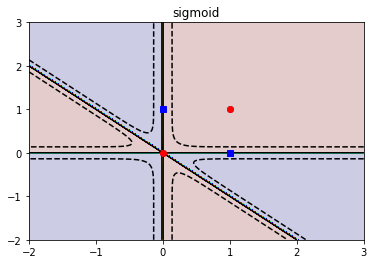

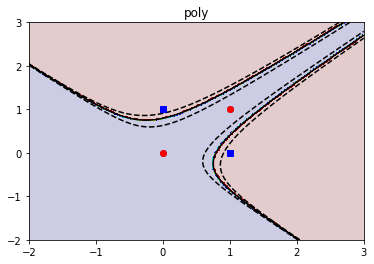

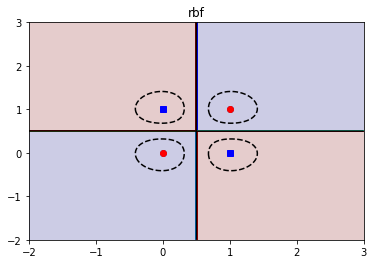

In [97]:
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
Y = [0]*2 + [1]*2

for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=4, coef0=0)
    clf.fit(X, Y)

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
    plt.plot(X[:2, 0], X[:2, 1], 'ro')
    plt.plot(X[2:, 0], X[2:, 1], 'bs')

    x_min, x_max = -2, 3
    y_min, y_max = -2, 3
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # XX.shape = YY.shape = (200, 200)
    # XX = [[-2, -2, ..., -2],
    #       [-1.97, ..., -1.97],
    #               ...
    #       [2.97, ..., 2.97],
    #       [3, 3, ..., 3]]

    # YY = [[-2, -1.97, ..., 2.97, 3],
    #       [-2, -1.97, ..., 2.97, 3],
    #               ...
    #       [-2, -1.97, ..., 2.97, 3]]

    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # Z.shape = (40000,)
    # XX.ravel() = [-2, -2, ..., 3, 3], shape = (40000,)
    # YY.ravel() = [-2, -1.97, ..., 2.97, 3], shape = (40000,)
    # np.c_[XX.ravel(), YY.ravel()]: col 1 = XX.ravel(), col 2 = YY.ravel; shape = (40000, 2)
    
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title(kernel)

    plt.show()